### euler
___

In [1]:
def euler(f, x, t, h):
    """Perform one step of the Euler method"""
    return x + f(x, t) * h

### rk4
___

In [2]:
def rk4(f, x, t, h):
    k1 = f (x, t)
    k2 = f (x+k1*h/2, t+h/2)
    k3 = f (x+k2*h/2, t+h/2)
    k4 = f (x+k3*h, t+h)
    return  x + (k1 + 2*k2 + 2*k3 + k4)*h/6

### solveto
___
I use the while statement and indicate that the value of solveto is 1 when T1 = T2.

In [3]:
def solveto(f, x1, t1, t2, hmax, method=euler):
    M = method
    if M == euler and t2 - t1 != 0:
       while t1 < t2:
             x2 = x1
             x1 = euler(f, x1, t1, hmax)
             t1 = t1 + hmax
             if t1 == t2:
                return x1
             elif t1 > t2:
                  hmax0 = t2 - t1 + hmax
                  tm = t1 - hmax
                  return x2 + f(x2, tm) * hmax0
    if M == rk4 and t2 - t1 != 0:
       while t1 < t2:
             x2 = x1
             x1 = rk4(f, x1, t1, hmax)
             t1 = t1 + hmax
             if t1 == t2:
                return x1
             elif t1 > t2:
                  hmax0 = t2 - t1 + hmax
                  tm = t1 - hmax
                  return rk4(f, x2, tm, hmax0)
    if t2 - t1 == 0:
       XX = 1
       return XX

### odesolve
___

In [4]:
def odesolve(f, X0, t, hmax, method=euler):
    import numpy as np
    M = method
    X01 = np.array(X0)
    t1 = np.array(t)
    X02 = X01[0]
    i = 0
    list = []
    if M == euler:
        while i < 5:
              X03 = solveto(f, X02, t1[i], 1, hmax, euler)
              i = i + 1
              list.insert(0, X03)
        C = np.array(list)
        D = np.mat(C)
        return D
    if M == rk4:
       while i < 5:
            while i < 5:
              X03 = solveto(f, X02, t1[i], 1, hmax, rk4)
              i = i + 1
              list.insert(0, X03)
       C = np.array(list)
       D = np.mat(C)
       return D

the code which will give the plot.

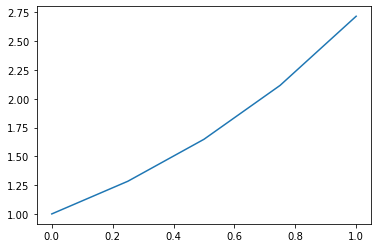

In [5]:
import matplotlib.pyplot as pl
import numpy as np
def f(x,t):
    return x
x0 = [1]
tvals = np.linspace(0, 1, 5)
ge = odesolve(f, x0, tvals, 0.001, euler)
pl.plot(tvals, ge.T)
pl.savefig('shm.pdf')
pl.show( )
